Multiply two polynomials using DFT,  $ 2x+3 $ and $6x+2$

Expected answer = $ 12x^2 + 22x + 6 = \begin{bmatrix} 6 \\ 12 \\ 22 \\ 0\end{bmatrix}$

In [2]:
import numpy as np 

def nearest_power_of_2(x):
    return int(pow(2, np.ceil(np.log(x)/np.log(2))));

def values_to_coefficients(values):
    return np.fft.ifft(values)

def coefficients_to_values(coefficients):
    return np.fft.fft(coefficients)

def fft_multiplication(poly_a, poly_b):
    n2 = nearest_power_of_2(len(poly_a)+1)
    
    poly_a = np.append(poly_a, [0]*(n2-len(poly_a)))
    poly_b = np.append(poly_b, [0]*(n2-len(poly_b)))
    
    poly_a, poly_b =coefficients_to_values(poly_a), coefficients_to_values(poly_b)

    return values_to_coefficients(poly_a*poly_b)
    
fft_multiplication([3,2], [2,6])

array([ 6.+0.j, 22.+0.j, 12.+0.j,  0.+0.j])

### Two Qubit QFT with pennylane and H,S gates.

In [18]:
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)

def nth_roots_matrix(N):
    nth_roots = np.array([[np.exp(2 * np.pi * 1j * (r * k) / N) for k in range(N)] for r in range(N)])
    return nth_roots

@qml.qnode(dev)
def two_qubit_QFT(basis_id):
    N = num_wires
    U = (1/np.sqrt(2**num_wires))*nth_roots_matrix(2**num_wires)
    
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])
    qml.QubitUnitary(U, wires=range(num_wires))
    return qml.state()

print (two_qubit_QFT(3))

[[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.+0.j -0.-0.j]
 [ 0.+0.j -0.+0.j  0.-0.j -0.+0.j]
 [ 0.+0.j -0.-0.j -0.+0.j  0.+0.j]]
[ 5.00000000e-01+0.0000000e+00j -9.18485099e-17-5.0000000e-01j
 -5.00000000e-01+1.8369702e-16j  2.75545530e-16+5.0000000e-01j]


[ 5.00000000e-01+0.0000000e+00j -9.18485099e-17-5.0000000e-01j
 -5.00000000e-01+1.8369702e-16j  2.75545530e-16+5.0000000e-01j]
[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


(<Figure size 700x300 with 1 Axes>, <Axes: >)

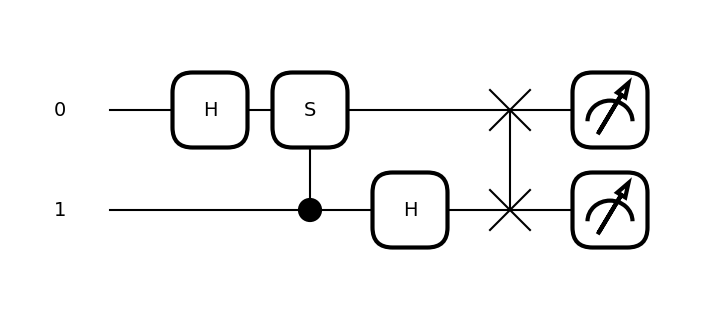

In [6]:
import pennylane as qml
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def two_qubit_QFT(basis_id):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])
    qml.QFT(wires=range(2))
    return qml.state()    

print (qml.QNode(two_qubit_QFT, dev)(3))

dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def two_qubit_QFT(basis_id):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.Hadamard(0)
    qml.ctrl(qml.S, control=1)(wires=0)
    qml.Hadamard(1)
    qml.SWAP(wires=[0,1])
    return qml.state()    

print (qml.QNode(two_qubit_QFT, dev)(3))
qml.draw_mpl(two_qubit_QFT)(3)

In [ ]:
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)

def nth_roots_matrix(N):
    nth_roots = np.array([[np.exp(-2 * np.pi * 1j * (r * k) / N) for k in range(N)] for r in range(N)])
    return nth_roots
    
@qml.qnode(dev)
def two_qubit_QFT(basis_id):
    N = num_wires
    U = (1/np.sqrt(N))*nth_roots_matrix(2**num_wires)
    
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])
    
    qml.QubitUnitary(U, wires=range(num_wires))
    return qml.state()

### Three qubit QFT gates

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


(<Figure size 1000x400 with 1 Axes>, <Axes: >)

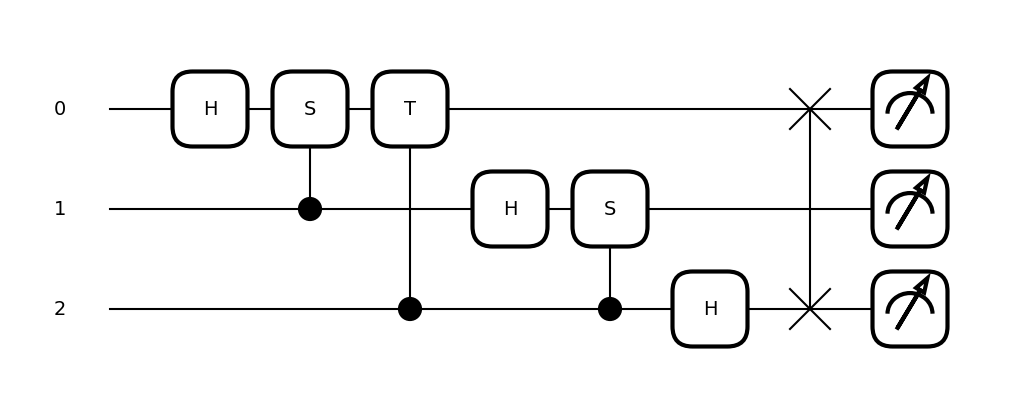

In [3]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def three_qubit_QFT(basis_id):
    bits = [int(x) for x in np.binary_repr(basis_id, width=dev.num_wires)]

    qml.Hadamard(0)
    qml.ctrl(qml.S, control=1)(wires=0)
    qml.ctrl(qml.T, control=2)(wires=0)
    qml.Hadamard(1)
    qml.ctrl(qml.S, control=2)(wires=1)
    qml.Hadamard(2)
    qml.SWAP(wires=[0,2])
    
    return qml.state()    

print (qml.QNode(three_qubit_QFT, dev)(3))
qml.draw_mpl(three_qubit_QFT)(3)

In [4]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def three_qubit_QFT(basis_id):
    bits = [int(x) for x in np.binary_repr(basis_id, width=dev.num_wires)]
    rk = lambda k: np.array([[1,0],[0, np.exp((2*np.pi*1j)/2**k)]])
    qml.Hadamard(0)
    qml.ctrl(qml.QubitUnitary, control=1)(rk(2), wires=0)
    qml.ctrl(qml.QubitUnitary, control=2)(rk(3), wires=0)
    qml.Hadamard(1)
    qml.ctrl(qml.QubitUnitary, control=2)(rk(2), wires=1)
    qml.Hadamard(2)
    qml.SWAP(wires=[0,2])
    return qml.state()    

# qml.draw_mpl(three_qubit_QFT)(3)
print (qml.QNode(three_qubit_QFT, dev)(7))


[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


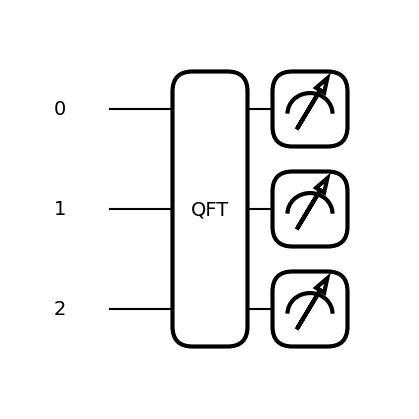

In [5]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def three_qubit_QFT(basis_id):
    bits = [int(x) for x in np.binary_repr(basis_id, width=dev.num_wires)]
    rk = lambda k: np.array([[1,0],[0, np.exp((2*np.pi*1j)/2**k)]])
    qml.QFT(wires=[0,1,2])
    return qml.state()    

qml.draw_mpl(three_qubit_QFT)(3)
print (qml.QNode(three_qubit_QFT, dev)(0))


### N-Qubit QFT gates with rotations

0 1 90.0
0 2 45.0
0 3 22.5
1 2 90.0
1 3 45.0
2 3 90.0


(<Figure size 1600x500 with 1 Axes>, <Axes: >)

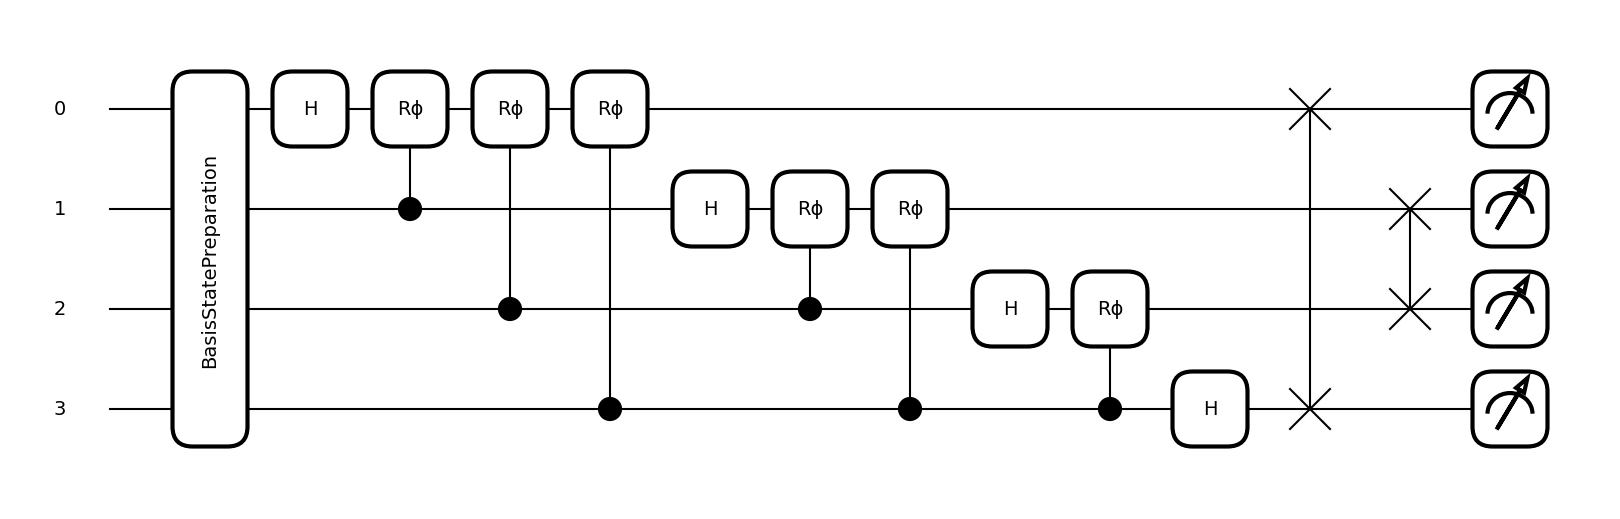

In [6]:
def swap_bits(n_qubits):
    for i in range(n_qubits//2):
        qml.SWAP(wires=[i, n_qubits-1-i])

dev = qml.device('default.qubit', wires=4)

def qft_rotations(n_qubits):
    for wire in range (n_qubits):
        qml.Hadamard(wire)
        for ctrl in range(wire+1,n_qubits):
            print (wire, ctrl, 180/2**(ctrl-wire))
            qml.ControlledPhaseShift(np.pi/2**(ctrl-wire), wires=[ctrl, wire])

@qml.qnode(dev) 
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisStatePreparation(bits, wires=range(n_qubits))
    qft_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()

qml.draw_mpl(qft_node)(0,4)


[ 0.5+0.j  -0. -0.5j -0.5+0.j   0. +0.5j] (-0-1j)


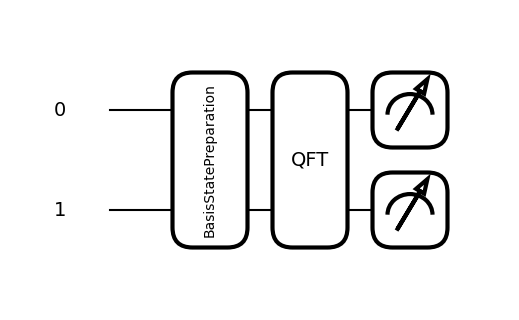

In [18]:
import pennylane as qml
n_bits = 2
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def two_qubit_QFT(basis_id):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=dev.num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])
    qml.QFT(wires=range(2))
    return qml.state()    

qml.draw_mpl(two_qubit_QFT)(3)
angle = 2*np.pi*(1/2 + 1/4)
print (np.round(qml.QNode(two_qubit_QFT, dev)(3), 5), np.round(np.cos(angle) + 1j*np.sin(angle), 5))

0 1 1.5707963267948966
0 2 0.7853981633974483
0 3 0.39269908169872414
1 2 1.5707963267948966
1 3 0.7853981633974483
2 3 1.5707963267948966


(<Figure size 1400x500 with 1 Axes>, <Axes: >)

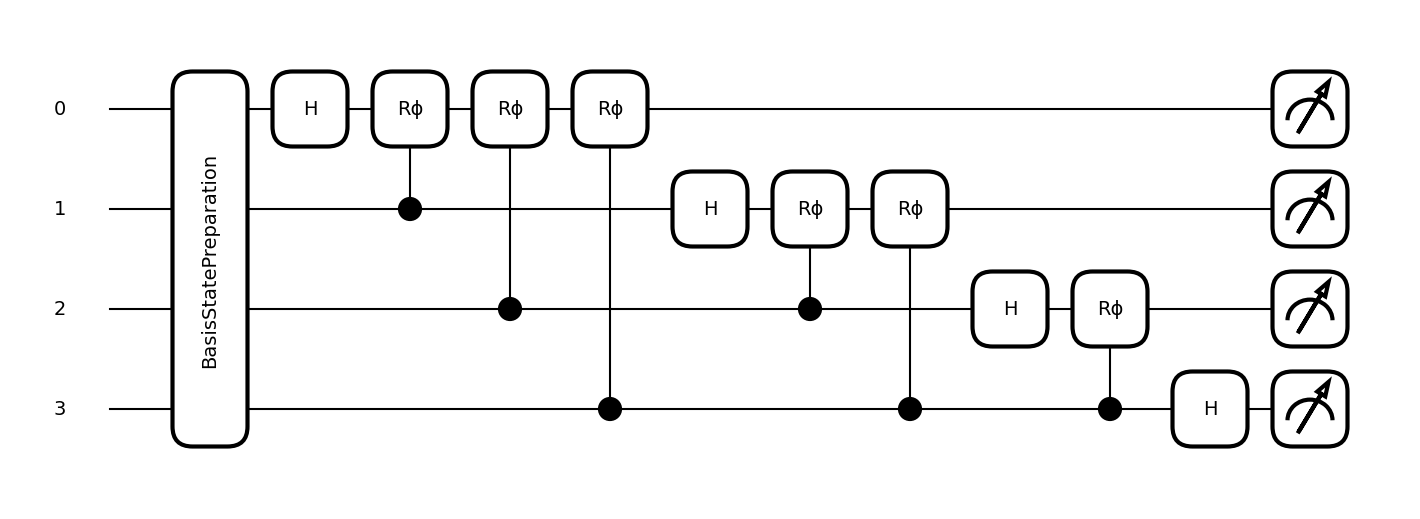

In [28]:
# F 3.4 Recursive method for QFT. 

dev = qml.device('default.qubit', wires=4)

def qft_recursive_rotations(n_qubits, wire=0):
    if n_qubits == wire:
        return
    qml.Hadamard(wire)
    for ctrl in range(wire+1,n_qubits):
        print (wire, ctrl, np.pi/2**(ctrl-wire))
        qml.ControlledPhaseShift(np.pi/2**(ctrl-wire), wires=[ctrl, wire])
        
    qft_recursive_rotations(n_qubits, wire+1)

@qml.qnode(dev) 
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisStatePreparation(bits, wires=range(n_qubits))
    qft_recursive_rotations(n_qubits)
    # swap_bits(n_qubits)
    return qml.state()

qml.draw_mpl(qft_node)(3, 4)
